## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_excel("/content/drive/MyDrive/MBKM/Streaming Data Dummy.xlsx")

## EDA

In [3]:
df.head()

,Nama,Spotify Streams,Youtube Music Plays,Joox Streams,Apple Music Streams
0,Difki Khalif,659,10942,1479,17919
1,Aziz Hedra,682,14356,702,8607
2,Rangga Damara,1131,7386,3102,7514
3,Devano,1353,2227,3459,16609
4,Isyana Sarasvati,2193,14202,2514,9819


In [4]:
df.shape

(175, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nama                 175 non-null    object
 1   Spotify Streams      175 non-null    int64 
 2   Youtube Music Plays  175 non-null    int64 
 3   Joox Streams         175 non-null    int64 
 4   Apple Music Streams  175 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.describe()

,Spotify Streams,Youtube Music Plays,Joox Streams,Apple Music Streams
count,175.000000,175.000000,175.00000,175.000000
mean,50741.365714,7723.754286,2469.08000,9324.068571
std,28407.452301,4252.336775,1443.10897,5744.602381
min,659.000000,72.000000,36.00000,256.000000
25%,27720.500000,3821.500000,1199.50000,4017.500000
50%,50424.000000,8106.000000,2560.00000,8951.000000
75%,73266.000000,11341.500000,3570.00000,13869.000000
max,98729.000000,14846.000000,4966.00000,19956.000000


## Pre-processing

Null Values

In [7]:
df.isnull().sum()

Nama                   0
Spotify Streams        0
Youtube Music Plays    0
Joox Streams           0
Apple Music Streams    0
dtype: int64

Similarity Score

In [8]:
data = pd.DataFrame(df).set_index('Nama')

In [9]:
similarity_matrix = cosine_similarity(data)

In [10]:
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

print(similarity_df)

          0         1         2         3         4         5         6    \
0    1.000000  0.885918  0.949603  0.907443  0.908723  0.982339  0.830679   
1    0.885918  1.000000  0.938003  0.619454  0.989164  0.929358  0.908484   
2    0.949603  0.938003  1.000000  0.809988  0.973156  0.960557  0.951079   
3    0.907443  0.619454  0.809988  1.000000  0.683727  0.844766  0.659025   
4    0.908723  0.989164  0.973156  0.683727  1.000000  0.951207  0.955854   
..        ...       ...       ...       ...       ...       ...       ...   
170  0.242221  0.224188  0.306922  0.275416  0.314305  0.367993  0.506398   
171  0.127146  0.143404  0.200407  0.149726  0.226064  0.264697  0.423339   
172  0.139390  0.178295  0.228753  0.143230  0.259935  0.281440  0.458971   
173  0.204020  0.205090  0.270325  0.224572  0.289663  0.336751  0.479250   
174  0.169640  0.190906  0.249635  0.182019  0.274569  0.307282  0.470533   

          7         8         9    ...       165       166       167  \
0  

## Artist yang perlu disupport

In [11]:
similarity_df_unstacked = similarity_df.unstack().reset_index()
similarity_df_unstacked.columns = ['Nama1', 'Nama2', 'Similarity']

similarity_df_filtered = similarity_df_unstacked[similarity_df_unstacked['Nama1'] != similarity_df_unstacked['Nama2']]

top_6_similarity = similarity_df_filtered.sort_values(by='Similarity', ascending=False).head(6)

print("\n6 Skor Similarity Artis yang Di-support:")
print(top_6_similarity)


6 Skor Similarity Artis yang Di-support:
       Nama1  Nama2  Similarity
20764    118    114    0.999982
20068    114    118    0.999982
21100    120    100    0.999978
17620    100    120    0.999978
24292    138    142    0.999973
24988    142    138    0.999973


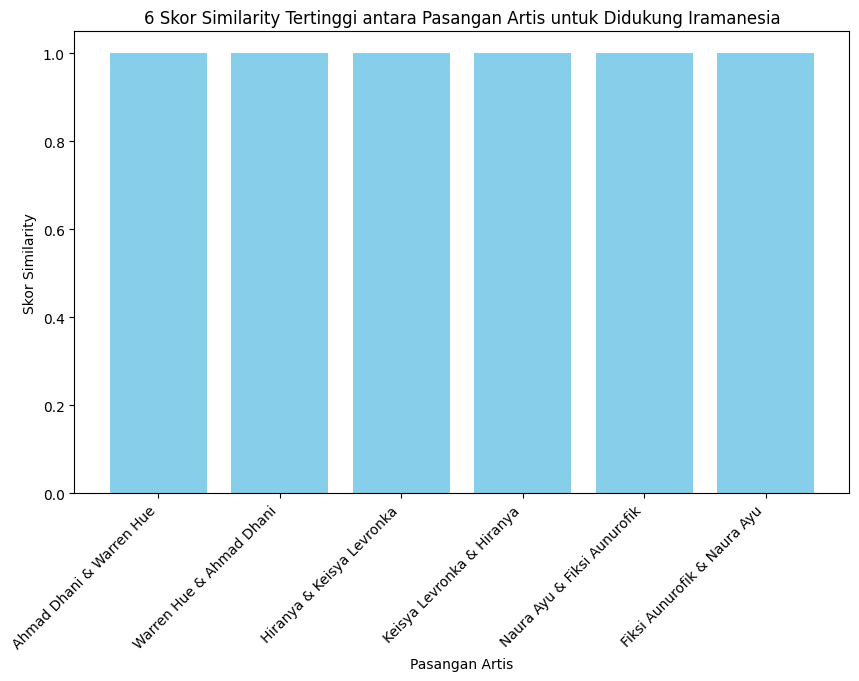

In [12]:
def get_penyanyi_by_index(df, index):
    return df.Nama[index]

plt.figure(figsize=(10, 6))

nama1_indices = top_6_similarity['Nama1'].values
nama2_indices = top_6_similarity['Nama2'].values

nama_penyanyi_pasangan = [
    f"{get_penyanyi_by_index(df, i)} & {get_penyanyi_by_index(df, j)}"
    for i, j in zip(nama1_indices, nama2_indices)
]

plt.bar(
    nama_penyanyi_pasangan,
    top_6_similarity['Similarity'],
    color='skyblue'
)
plt.xlabel('Pasangan Artis')
plt.ylabel('Skor Similarity')
plt.title('6 Skor Similarity Tertinggi antara Pasangan Artis untuk Didukung Iramanesia')
plt.xticks(rotation=45, ha='right')
plt.show()


## Artist yang akan menjadi konten di Instagram

In [13]:
data['Total Pendengar'] = data[['Spotify Streams', 'Youtube Music Plays', 'Joox Streams', 'Apple Music Streams' ]].sum(axis=1)

data['Skor Popularitas'] = data['Total Pendengar'] / data['Total Pendengar'].max()

df_sorted = data.sort_values(by='Skor Popularitas', ascending=False)

top_6_penyanyi = df_sorted.head(6)
top_6_penyanyi = top_6_penyanyi[['Skor Popularitas']]

print("\n6 Rekomendasi Artis untuk Instagram Konten:")
print(top_6_penyanyi)


6 Rekomendasi Artis untuk Instagram Konten:
                   Skor Popularitas
Nama                               
Lyodra                     1.000000
Rendy Pandugo              0.962433
Purpla                     0.955387
Rebelsuns.                 0.953094
The Brandals               0.938903
Harry Roesli Gang          0.937922


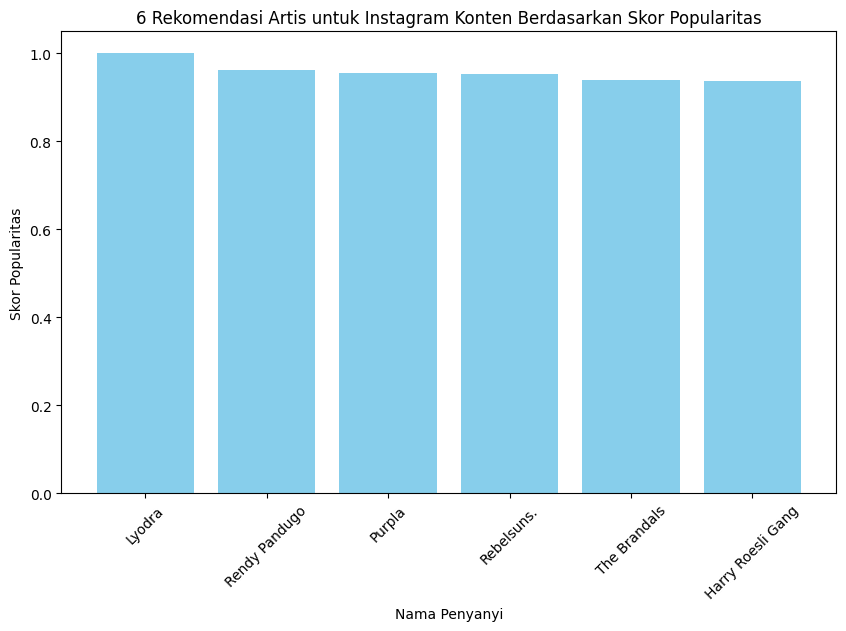

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_6_penyanyi.index, top_6_penyanyi['Skor Popularitas'], color='skyblue')
plt.xlabel('Nama Penyanyi')
plt.ylabel('Skor Popularitas')
plt.title('6 Rekomendasi Artis untuk Instagram Konten Berdasarkan Skor Popularitas')
plt.xticks(rotation=45)
plt.show()